> Boom Bikes Linear Regression Assignment
>
>> Chaitanya Namburu
>

    

In [664]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [665]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [666]:
dfBikes = pd.read_csv("day.csv")
dfBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Checks

In [667]:
dfBikes.isnull().sum().sort_values(ascending=False)

# There are no nulls in any columns

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [668]:
# Drop duplicates

dfBikes.drop(['instant'], axis=1, inplace=True)

print("Before drop duplicates: ", dfBikes.shape)

dfBikes.drop_duplicates(subset=None, inplace=True)

print("After drop duplicates: ", dfBikes.shape)

Before drop duplicates:  (730, 15)
After drop duplicates:  (730, 15)


## Understanding the data through EDA

In [669]:
dfBikes.shape

(730, 15)

In [670]:
dfBikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [671]:
dfBikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


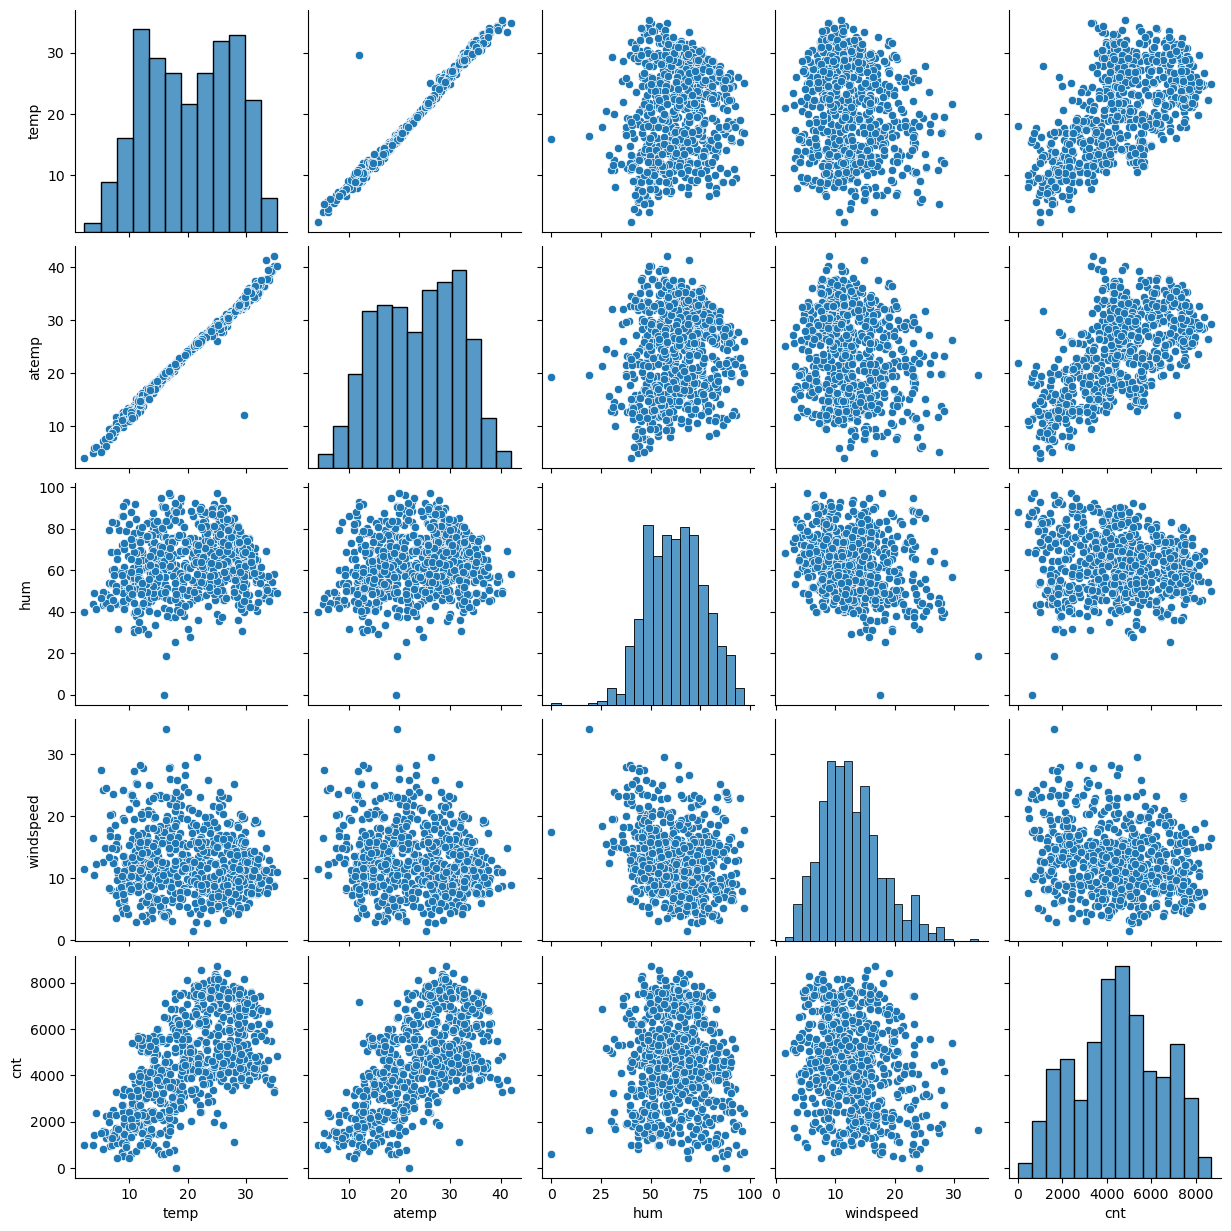

In [672]:
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed','cnt']

sns.pairplot(dfBikes[numerical_variables])
plt.show()

In [673]:
# Replacing the Categorical values with meaningful names

import calendar

dfBikes['season'] = dfBikes['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

dfBikes['weekday'] = dfBikes['weekday'].map({1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6:'saturday', 0: 'sunday'})

dfBikes['workingday'] = dfBikes['workingday'].map({1: 'workingday', 0: 'nonworkingday'})

dfBikes['holiday'] = dfBikes['holiday'].map({1: 'holiday', 0: 'nonholiday'})

dfBikes['weathersit'] = dfBikes['weathersit'].map({1: 'clear', 2: 'mist', 3: 'lightsnow', 4: 'heavyrain'})

dfBikes['mnth'] = dfBikes['mnth'].apply(lambda x: calendar.month_abbr[x])

dfBikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,nonholiday,saturday,nonworkingday,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,nonholiday,sunday,nonworkingday,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,nonholiday,monday,workingday,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,nonholiday,tuesday,workingday,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,nonholiday,wednesday,workingday,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


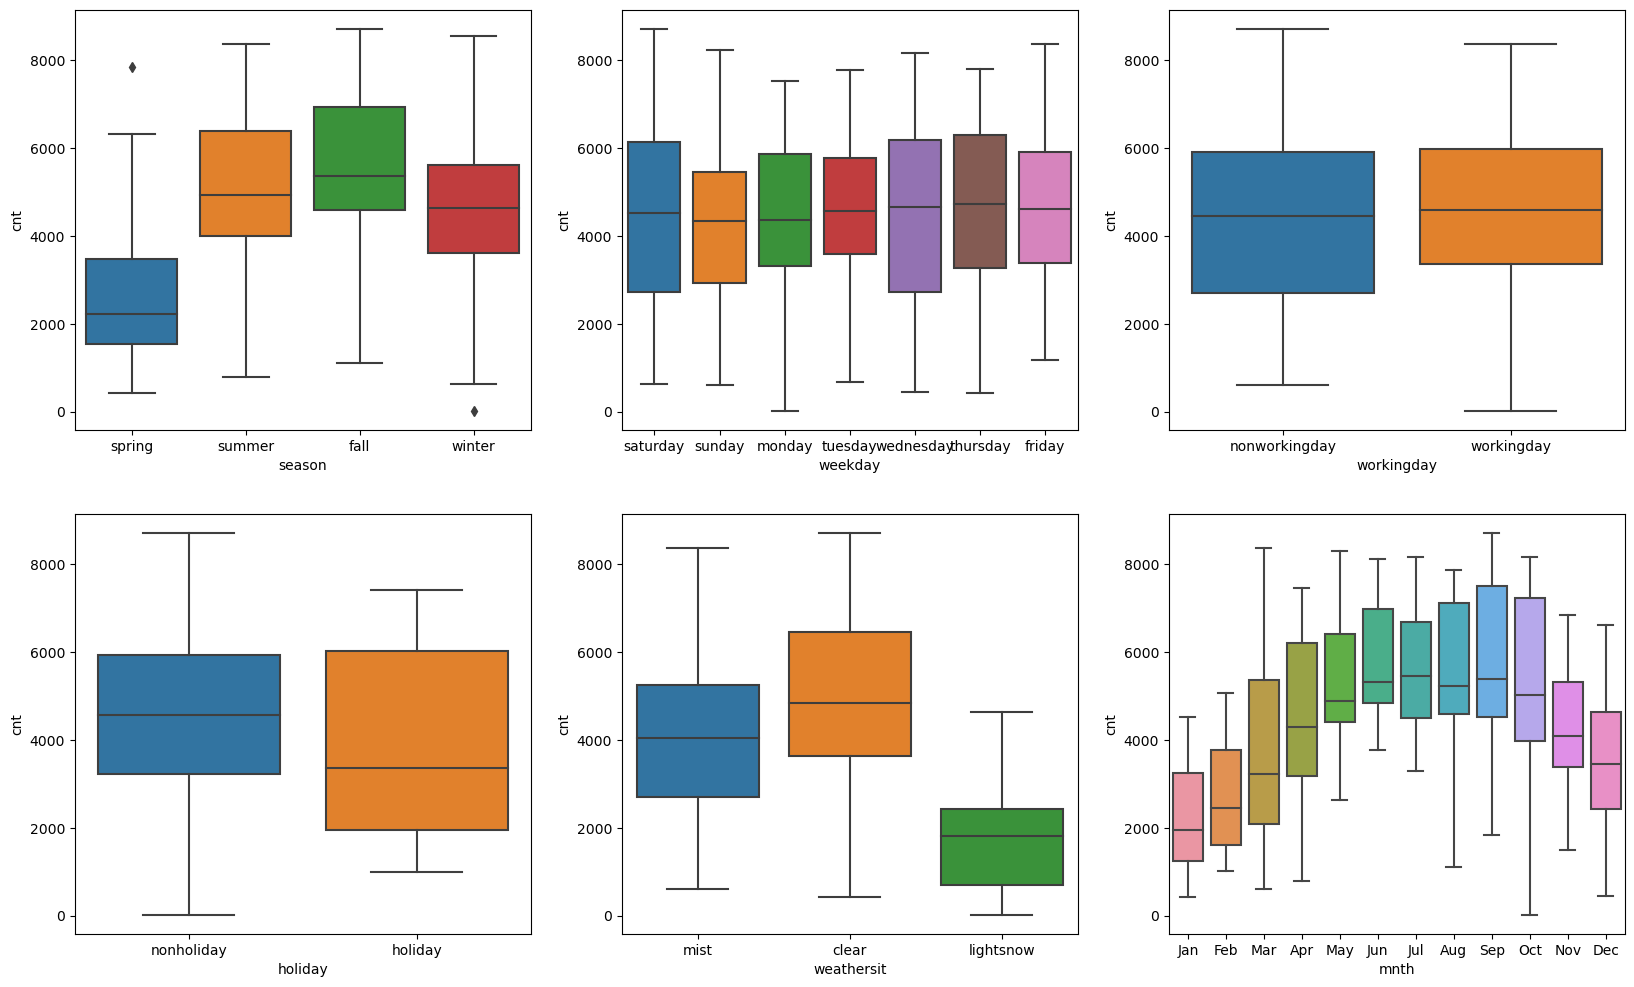

In [674]:
# Box plots for understanding the categorical data

#Utility function
def BoxPlotBikeData(rows, cols, index, columnName):
    plt.subplot(rows,cols,index)
    sns.boxplot(x = columnName, y = 'cnt', data = dfBikes)

plt.figure(figsize=(20,12))

BoxPlotBikeData(2,3,1, 'season')
BoxPlotBikeData(2,3,2, 'weekday')
BoxPlotBikeData(2,3,3, 'workingday')
BoxPlotBikeData(2,3,4, 'holiday')
BoxPlotBikeData(2,3,5, 'weathersit')
BoxPlotBikeData(2,3,6, 'mnth')

plt.show()

## Data Preparation

#### Remove unnecessary columns

In [675]:
# Remove the unnecessary columns in data
dfBikes = dfBikes.drop(['casual','registered', 'dteday'], axis=1)

dfBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,nonholiday,saturday,nonworkingday,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,nonholiday,sunday,nonworkingday,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,nonholiday,monday,workingday,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,nonholiday,tuesday,workingday,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,nonholiday,wednesday,workingday,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Replace with dummy variables

In [676]:
# Set the datatype of each column to be Categorical
# Replace the Categorical Variables with Dummy values

categorical_variables = ['season', 'weekday', 'workingday', 'holiday', 'weathersit', 'mnth']

for cat_var in categorical_variables:
    print('Setting dummy variables for ' + cat_var)

    dfBikes[cat_var] = dfBikes[cat_var].astype('category')

    cat_dummies_columns =  pd.get_dummies(dfBikes[cat_var], drop_first=True)

    dfBikes = pd.concat([dfBikes, cat_dummies_columns], axis=1)

    dfBikes.drop([cat_var], axis=1, inplace=True)

    print(f"Total columns: {len(dfBikes.columns)}")

    print('------------------------------')


print('After replacing categorical variables with dummy values:')
print(dfBikes.head(10))

Setting dummy variables for season
Total columns: 14
------------------------------
Setting dummy variables for weekday
Total columns: 19
------------------------------
Setting dummy variables for workingday
Total columns: 18
------------------------------
Setting dummy variables for holiday
Total columns: 18
------------------------------
Setting dummy variables for weathersit
Total columns: 19
------------------------------
Setting dummy variables for mnth
Total columns: 29
------------------------------
After replacing categorical variables with dummy values:
   yr       temp     atemp      hum  windspeed   cnt  spring  summer  winter  \
0   0  14.110847  18.18125  80.5833  10.749882   985       1       0       0   
1   0  14.902598  17.68695  69.6087  16.652113   801       1       0       0   
2   0   8.050924   9.47025  43.7273  16.636703  1349       1       0       0   
3   0   8.200000  10.60610  59.0435  10.739832  1562       1       0       0   
4   0   9.305237  11.46350  43.

In [677]:
dfBikes.shape

(730, 29)

## Split the data into Test & Train data sets       

In [678]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
dfBikes_train, dfBikes_test = train_test_split(dfBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [679]:
print(dfBikes_train.shape)

print(dfBikes_test.shape)

(510, 29)
(219, 29)


## Scale the features       

In [680]:
dfBikes_train[numerical_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.102429,23.493909,63.112926,12.831318,4486.382353
std,7.431169,8.090038,14.156632,5.291832,1952.158739
min,2.424346,3.953480,0.000000,2.834381,22.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,20.209597,24.020400,63.437500,12.083182,4530.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000
max,35.328347,42.044800,97.041700,34.000021,8714.000000


In [681]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfBikes_train[numerical_variables] = scaler.fit_transform(dfBikes_train[numerical_variables])

In [682]:
dfBikes_train[numerical_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


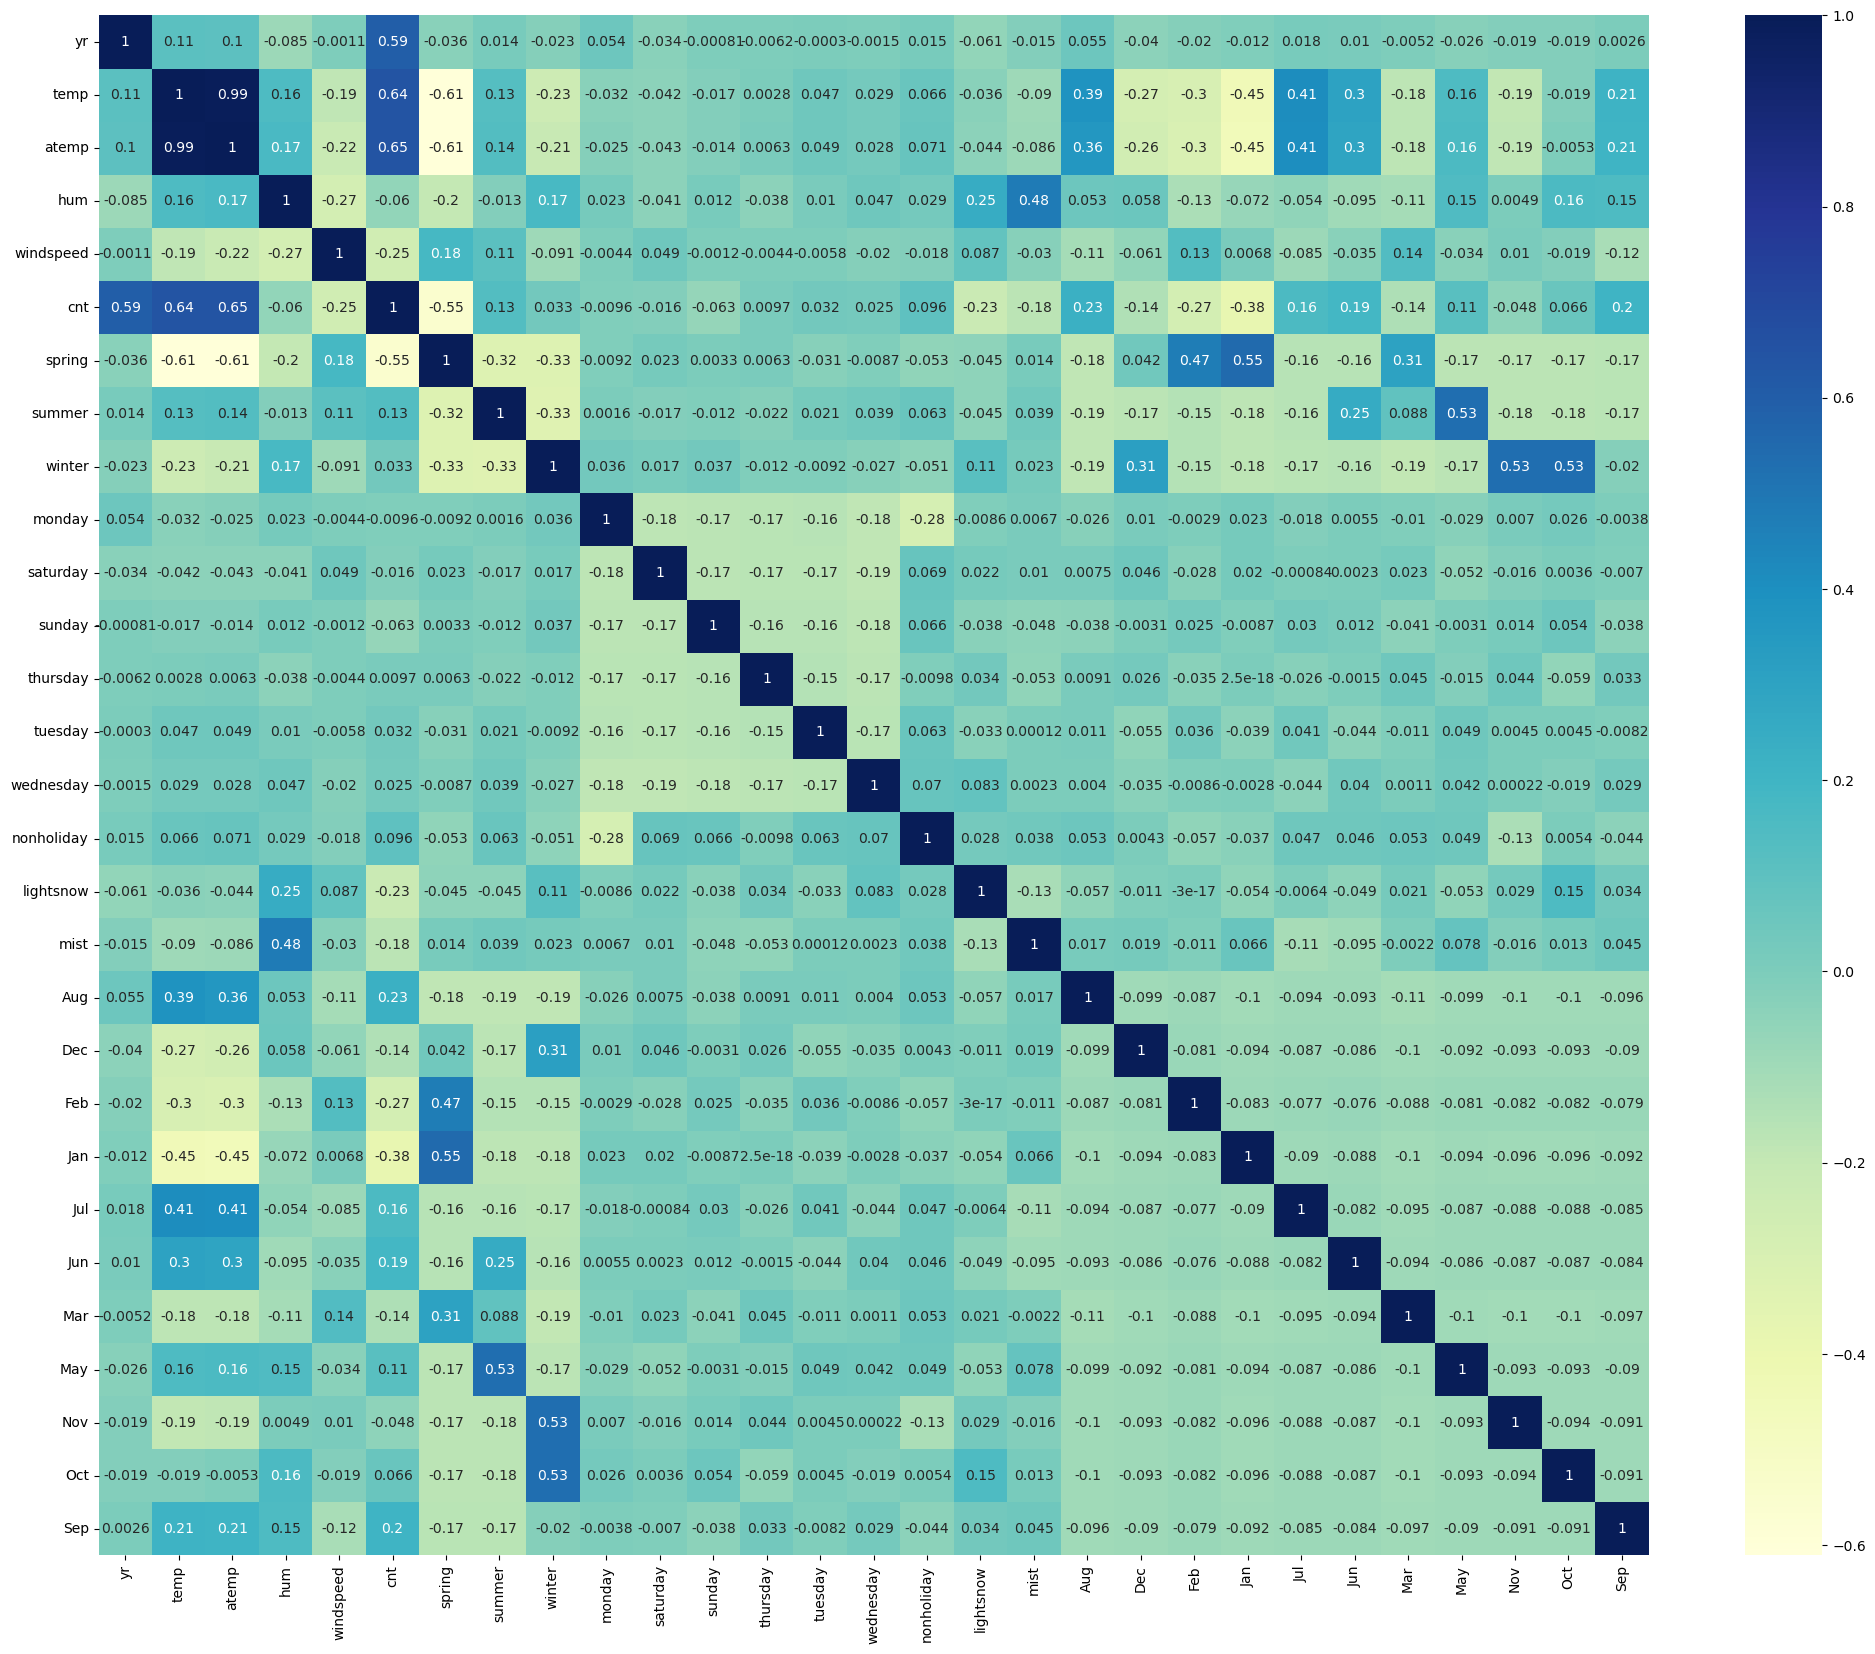

In [683]:
plt.figure(figsize = (25, 20))
sns.heatmap(dfBikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building a Linear Model

### Utility functions to create and observe models

In [684]:
import statsmodels.api as sm

# Function to construct a linear model
def ConstructLinearRegressionModel(X_train, y_train):
    # Add a constant
    X_train_lm = sm.add_constant(X_train)

    # Create a first fitted model
    lrModel = sm.OLS(y_train, X_train_lm).fit()

    return lrModel

In [685]:
# Function to calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Base Model using RFE

Construct the base model using RFE and improve it further by using metrics

In [686]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

y_train = dfBikes_train.pop('cnt')

lm.fit(dfBikes_train, y_train)

rfe = RFE(lm, step=20)
rfe = rfe.fit(dfBikes_train, y_train)

In [687]:
list(zip(dfBikes_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('monday', False, 2),
 ('saturday', False, 2),
 ('sunday', True, 1),
 ('thursday', False, 2),
 ('tuesday', False, 2),
 ('wednesday', False, 2),
 ('nonholiday', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1)]

In [688]:
columnsInBaseModel = dfBikes_train.columns[rfe.support_]

columnsInBaseModel

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'sunday',
       'nonholiday', 'lightsnow', 'mist', 'Dec', 'Jan', 'Sep'],
      dtype='object')

In [689]:
# Create the base model with the selected columns

X_train_base_model = dfBikes_train[columnsInBaseModel]

In [690]:
lr_model_base = ConstructLinearRegressionModel(X_train_base_model, y_train)

print(lr_model_base.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.14e-187
Time:                        21:37:26   Log-Likelihood:                 506.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     495   BIC:                            -920.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2586      0.041      6.384      0.0

In [691]:
Calculate_VIF(X_train_base_model)

      Features     VIF
2        atemp  353.40
1         temp  348.65
3          hum   29.76
8   nonholiday   24.50
4    windspeed    4.66
5       spring    3.12
10        mist    2.29
6       winter    2.28
0           yr    2.08
12         Jan    1.74
11         Dec    1.35
9    lightsnow    1.25
7       sunday    1.19
13         Sep    1.17


### Model 1 - drop "atemp" because it has high VIF

In [692]:
column_removed_in_model_1 = 'atemp'

X_train_model_1 = X_train_base_model.drop([column_removed_in_model_1], axis=1)

print(X_train_model_1.columns)

print(len(X_train_model_1.columns))

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'sunday',
       'nonholiday', 'lightsnow', 'mist', 'Dec', 'Jan', 'Sep'],
      dtype='object')
13


In [693]:
lr_model_1 = ConstructLinearRegressionModel(X_train_model_1, y_train)

print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.74e-188
Time:                        21:37:26   Log-Likelihood:                 506.71
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     496   BIC:                            -926.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2595      0.040      6.411      0.0

In [694]:
Calculate_VIF(X_train_model_1)

      Features    VIF
2          hum  29.47
7   nonholiday  24.36
1         temp  16.20
3    windspeed   4.52
4       spring   3.12
9         mist   2.29
5       winter   2.27
0           yr   2.08
11         Jan   1.73
10         Dec   1.35
8    lightsnow   1.24
6       sunday   1.19
12         Sep   1.17


### Model 2 - Remove "hum"

Remove the variable "hum" as it has high VIF

In [695]:
column_removed_in_model_2 = 'hum'

X_train_model_2 = X_train_model_1.drop(column_removed_in_model_2, 1)

print(X_train_model_2.columns)

print(len(X_train_model_2.columns))

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'sunday', 'nonholiday',
       'lightsnow', 'mist', 'Dec', 'Jan', 'Sep'],
      dtype='object')
12


In [696]:
lr_model_2 = ConstructLinearRegressionModel(X_train_model_2, y_train)

print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.01e-187
Time:                        21:37:26   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1961      0.035      5.556      0.0

In [697]:
Calculate_VIF(X_train_model_2)

      Features    VIF
6   nonholiday  19.47
1         temp  11.48
2    windspeed   4.50
3       spring   2.89
0           yr   2.07
4       winter   1.92
10         Jan   1.70
8         mist   1.57
9          Dec   1.32
5       sunday   1.18
11         Sep   1.16
7    lightsnow   1.09


### Model 3 - Remove "nonholiday" as it has high VIF

In [698]:
column_removed_in_model_3 = 'nonholiday'

X_train_model_3 = X_train_model_2.drop(column_removed_in_model_3, 1)

print(X_train_model_3.columns)

print(len(X_train_model_3.columns))

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'sunday', 'lightsnow',
       'mist', 'Dec', 'Jan', 'Sep'],
      dtype='object')
11


In [699]:
lr_model_3 = ConstructLinearRegressionModel(X_train_model_3, y_train)

print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.86e-185
Time:                        21:37:26   Log-Likelihood:                 493.36
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     498   BIC:                            -911.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2995      0.025     11.991      0.0

In [700]:
Calculate_VIF(X_train_model_3)

     Features   VIF
2   windspeed  3.95
1        temp  3.84
3      spring  2.35
0          yr  2.06
9         Jan  1.64
4      winter  1.61
7        mist  1.51
8         Dec  1.28
5      sunday  1.17
10        Sep  1.16
6   lightsnow  1.08


### Model 4 - Remove windspeed 

In [701]:
column_removed_in_model_4 = 'windspeed'

X_train_model_4 = X_train_model_3.drop(column_removed_in_model_4, 1)

print(X_train_model_4.columns)
len(X_train_model_4.columns)

Index(['yr', 'temp', 'spring', 'winter', 'sunday', 'lightsnow', 'mist', 'Dec',
       'Jan', 'Sep'],
      dtype='object')


10

In [702]:
lr_model_4 = ConstructLinearRegressionModel(X_train_model_4, y_train)

print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.52e-178
Time:                        21:37:26   Log-Likelihood:                 475.53
No. Observations:                 510   AIC:                            -929.1
Df Residuals:                     499   BIC:                            -882.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.023     10.038      0.0

In [703]:
Calculate_VIF(X_train_model_4)

    Features   VIF
1       temp  2.51
0         yr  2.05
2     spring  1.89
8        Jan  1.64
3     winter  1.53
6       mist  1.50
7        Dec  1.28
4     sunday  1.17
9        Sep  1.15
5  lightsnow  1.07


## Analysis

### Evaluation of Models using Prediction

Let us compare Model 3 and Model 4 for their performance using prediction on the test data set. I have written utility methods to make it easy to compare models

#### Scaling of Test data set

In [704]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

dfBikes_test[num_vars] = scaler.transform(dfBikes_test[num_vars])

In [705]:
dfBikes_test.describe()

,yr,temp,atemp,hum,windspeed,cnt,spring,summer,winter,monday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.127854,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.334692,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Utility function to predict and analyse model

In [706]:
# Utility function for prediction - this makes it easy to compare multiple models
# This function prints a graph of the regression model and prints R2 and Adjusted R2

from pandas import DataFrame
from statsmodels.regression.linear_model import RegressionResultsWrapper
from sklearn.metrics import r2_score

def EvaluateModelByPrediction(text, lrmodel: RegressionResultsWrapper, Xtest: DataFrame, Ytest: DataFrame):
    print(text)
    y_predicted = lrmodel.predict(Xtest)

    fig = plt.figure()
    sns.regplot(x=Ytest, y=y_predicted, fit_reg=True,scatter_kws={'s':4, "color": "blue"}, line_kws={"color": "red"})
    fig.suptitle(text, fontsize = 20)             
    plt.xlabel('y_test', fontsize = 18)           
    plt.ylabel('y_pred', fontsize = 16)
    plt.show()
         
    n = Xtest.shape[0]
    p = Xtest.shape[1]

    r2 =  r2_score(Ytest, y_predicted)
    print("R^2 Score: ", r2)

    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('Adjusted R^2: ', adjusted_r2)

    return r2, adjusted_r2


#### Evaluation of Model 3

In [707]:
y_test = dfBikes_test.pop('cnt')

In [708]:
X_test = dfBikes_test[columnsInBaseModel]

In [709]:
# Evaluate Model 3

X_test_sm_3 = sm.add_constant(X_test)

columns_removed_in_model_3 = [column_removed_in_model_1, column_removed_in_model_2, column_removed_in_model_3]

X_test_sm_3 = X_test_sm_3.drop(columns_removed_in_model_3, axis = 1)

Evaluation of Model 3


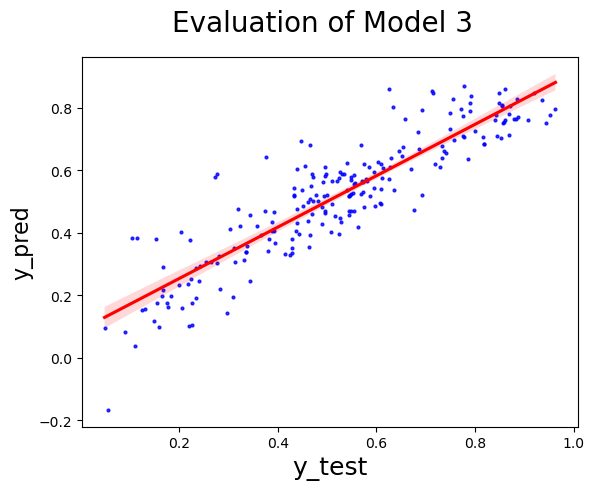

R^2 Score:  0.8053229467780136
Adjusted R^2:  0.7939825359107134


In [710]:
r2_model_3, adjusted_r2_model_3 = EvaluateModelByPrediction('Evaluation of Model 3', lr_model_3, X_test_sm_3, y_test)

#### Evaluation of Model 4

In [711]:
# Evaluate Model 4

X_test_sm_4 = sm.add_constant(X_test)

columns_removed_in_model_4 = [column_removed_in_model_1, column_removed_in_model_2, column_removed_in_model_3, column_removed_in_model_4]

X_test_sm_4 = X_test_sm_4.drop(columns_removed_in_model_4, axis = 1)

Evaluation of Model 4


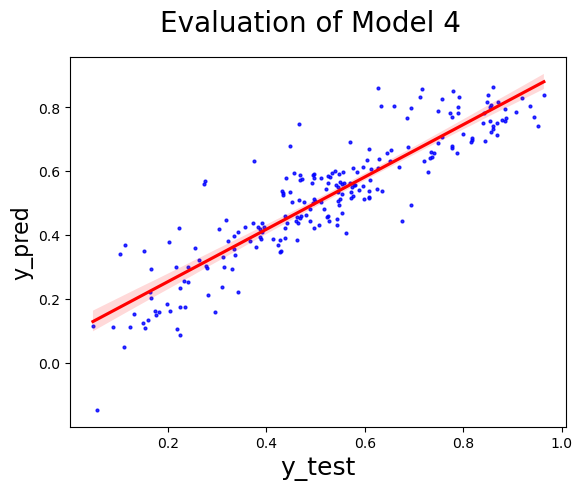

R^2 Score:  0.8119292853549838
Adjusted R^2:  0.8019351894076641


In [712]:
r2_model_4, adjusted_r2_model_4 = EvaluateModelByPrediction('Evaluation of Model 4', lr_model_4, X_test_sm_4, y_test)

#### Model Selection - <span style="color:red; font-weight:bold">Model 4 </span> seems to be performing well with Adjusted R^2 score greater than that of Model 3

### Analysis of Final Model - Model 4

#### Validation of Final Model

##### Homoscedasticity

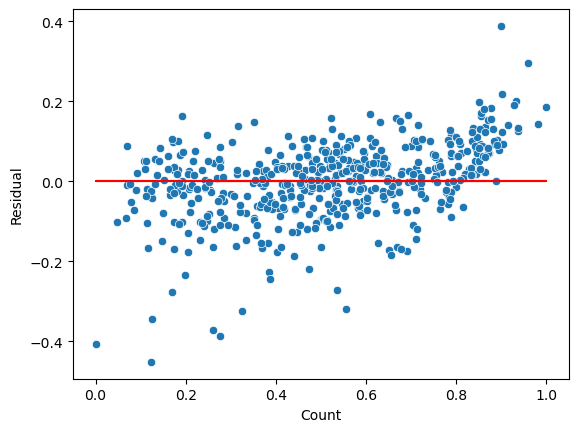

In [713]:
X_train_4_hm = sm.add_constant(X_train_model_4)

y_train_pred = lr_model_4.predict(X_train_4_hm)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### Analysis of Residuals

In [714]:
X_train_analysis = sm.add_constant(X_train_model_4)
y_train_prediction = lr_model_4.predict(X_train_analysis)

Text(0.5, 0, 'Errors')

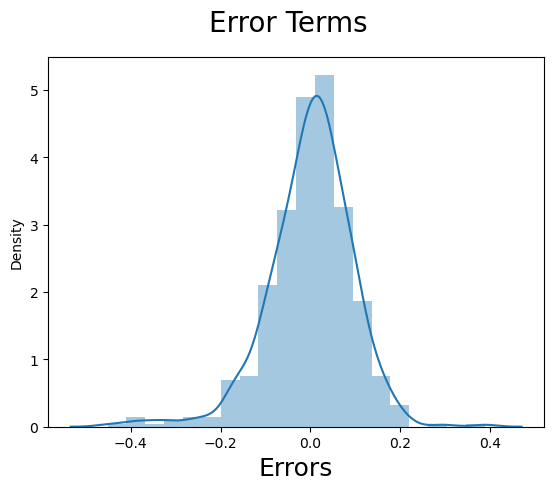

In [715]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_prediction), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)  

Error terms are in a normal distribution as is expected from a good linear regression model

#### Model Summary

In [716]:
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.52e-178
Time:                        21:37:26   Log-Likelihood:                 475.53
No. Observations:                 510   AIC:                            -929.1
Df Residuals:                     499   BIC:                            -882.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.023     10.038      0.0

#### R2 and Adjsuted R2 Metrics

In [717]:
from tabulate import tabulate

r2data =[
    [r2_model_4, adjusted_r2_model_4]
]

head = ["R2","Adjusted R2"]

print(tabulate(r2data, headers=head, tablefmt="grid"))

+----------+---------------+
|       R2 |   Adjusted R2 |
+==========+===============+
| 0.811929 |      0.801935 |
+----------+---------------+


R2 and Adjusted R2 are >= 80% which are good scores for a model

#### Parameters for prediction & Equation of Model

In [718]:
params = lr_model_4.params.reset_index()

params = params[params['index'] != 'const']
params = params.rename(columns={0:'coeff', 'index': 'parameter'})

# Adding absoulte value to get the 5 top influencing parameters in spite of the sign
params['absolute'] = params['coeff'].abs()
params = params.sort_values(by="absolute", ascending=False)

The 5 most important parameters important for predicting the count are as follows:

In [719]:
params[['parameter','coeff']].head(5)

,parameter,coeff
2,temp,0.410494
6,lightsnow,-0.306554
1,yr,0.234904
3,spring,-0.108781
7,mist,-0.076645


In [720]:
# Deriving the equation dynamically

round_digits = 5
equation = str(round(lr_model_4.params['const'], round_digits)) + " + "

for index, row in params.iterrows():
    equation = equation + "(" +  str(round(row['coeff'], round_digits)) + " * " + str(row['parameter']) + ") + "
    # print(row['coeff'])

equation = equation[:-2]

print("Equation: \n" + equation)


Equation: 
0.22828 + (0.41049 * temp) + (-0.30655 * lightsnow) + (0.2349 * yr) + (-0.10878 * spring) + (-0.07664 * mist) + (0.0712 * Sep) + (0.05636 * winter) + (-0.04674 * sunday) + (-0.04073 * Jan) + (-0.02615 * Dec) 


<span style="font-weight:bold; color:blue">Equation of Model:  </span>
<br/> <br/>

<span style="font-weight:bold;"> 0.22828 + (0.41049 * temp) + (-0.30655 * lightsnow) + (0.2349 * yr) + (-0.10878 * spring) + (-0.07664 * mist) + (0.0712 * Sep) + (0.05636 * winter) + (-0.04674 * sunday) + (-0.04073 * Jan) + (-0.02615 * Dec)   </span>